# Data plotting and analysis

In this notebook we show the plotting of de example Dual Regression (DR) maps and the extraction of the values from the DR maps for analysis

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn import image
from nilearn.input_data import MultiNiftiMasker
import nibabel as nib
import numpy as np
import pandas as pd
import scipy.stats as stats
import os

In [2]:
#load example DR maps
DR_301404= image.get_data('nii_files/sub-301404_DR_SM.nii.gz')

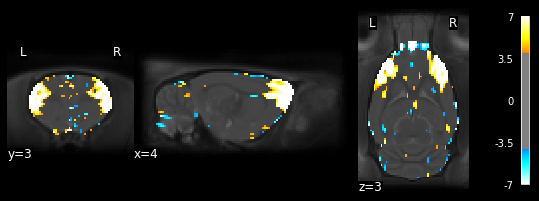

In [29]:
plotting.plot_stat_map(stat_map_img= 'nii_files/sub-301404_DR_SM.nii.gz', 
                       bg_img= 'nii_files/SIGMA_template_zoom.nii', 
                       display_mode='ortho',
                       cut_coords=(4,3,3.5), 
                       threshold= 4,
                       vmax= 7, 
                       draw_cross=False)

In [3]:
#move to data folder
os.chdir('/project/4180000.23/StandardRat/')

In [10]:
canica = image.load_img('canica_resting_state_clean.nii.gz')
canica_mask= image.math_img('img > 0', img=canica)
canica_mask.to_filename('canica_resting_state_binary.nii.gz')

In [15]:
#use MultiNiftiMasker to extract values from the DR maps and save to csv files 
for x in range(13):
    if x <10:
        masker= MultiNiftiMasker(mask_img=f'canica_binary/canica_binary_000{x}.nii.gz')
    else:
        masker= MultiNiftiMasker(mask_img=f'canica_binary/canica_binary_00{x}.nii.gz')
    masker.fit()

    sig3008 = masker.transform_imgs('DR_nii/sub-3008*')
    sig3014 = masker.transform_imgs('DR_nii/sub-3014*')

    sig3008_means = []
    sig3014_means = []

    for y in range(10):
        sig3008_means.append(sig3008[y][x].mean())
        sig3014_means.append(sig3014[y][x].mean())

    np.savetxt(f'DR_csv/sig3008_ICA{x}_means.csv', sig3008_means, delimiter=',')
    np.savetxt(f'DR_csv/sig3014_ICA{x}_means.csv', sig3014_means, delimiter=',')

In [24]:
#Read csv files with extracted values from the DR maps and combine into dataframe
means = pd.DataFrame(data=[1,2,3,4,5,6,7,8,9,10],columns=['Foo'])

for x in range(13):
    means_3008 = pd.read_csv(f'DR_csv/sig3008_ICA{x}_means.csv', header= None, names=[f'3008_ICA{x}'])
    means = means.join(means_3008)

    means_3014 = pd.read_csv(f'DR_csv/sig3014_ICA{x}_means.csv', header= None, names=[f'3014_ICA{x}'])
    means = means.join(means_3014)

means.head()

,Foo,3008_ICA0,3014_ICA0,3008_ICA1,3014_ICA1,3008_ICA2,3014_ICA2,3008_ICA3,3014_ICA3,3008_ICA4,...,3008_ICA8,3014_ICA8,3008_ICA9,3014_ICA9,3008_ICA10,3014_ICA10,3008_ICA11,3014_ICA11,3008_ICA12,3014_ICA12
0,1,10.665305,5.118857,3.869999,6.292029,1.440047,3.586627,3.649481,10.830112,4.246001,...,1.536179,7.252553,2.167448,5.172907,2.427500,7.412461,2.976330,9.089252,3.256780,6.270255
1,2,2.826890,4.958324,2.322385,6.344578,1.884375,4.065628,2.403098,7.024434,2.985670,...,1.575227,5.719491,1.973445,4.596039,2.921451,5.187029,2.992196,9.341570,2.100611,5.815225
2,3,4.659262,5.411857,3.527380,8.148099,2.731510,3.515016,2.919534,7.197757,3.155520,...,3.630821,6.181676,2.966167,4.716745,2.953970,4.640001,2.907124,9.736105,2.103442,6.334843
3,4,3.454966,6.892448,3.679248,5.980138,3.227068,3.086873,3.638015,6.838911,6.693238,...,5.045827,4.548732,2.805509,3.358369,4.295719,3.895268,4.932079,7.261209,1.854487,4.679886
4,5,3.306482,4.147705,7.890289,6.771964,6.096934,3.577662,5.990357,7.377526,12.801561,...,9.584108,6.134019,6.821022,5.363328,11.023729,4.173825,11.909432,6.379300,2.371724,5.402299


In [27]:
means.drop(['Foo'], axis=1, inplace=True)
means.head()

,3008_ICA0,3014_ICA0,3008_ICA1,3014_ICA1,3008_ICA2,3014_ICA2,3008_ICA3,3014_ICA3,3008_ICA4,3014_ICA4,...,3008_ICA8,3014_ICA8,3008_ICA9,3014_ICA9,3008_ICA10,3014_ICA10,3008_ICA11,3014_ICA11,3008_ICA12,3014_ICA12
0,10.665305,5.118857,3.869999,6.292029,1.440047,3.586627,3.649481,10.830112,4.246001,5.660710,...,1.536179,7.252553,2.167448,5.172907,2.427500,7.412461,2.976330,9.089252,3.256780,6.270255
1,2.826890,4.958324,2.322385,6.344578,1.884375,4.065628,2.403098,7.024434,2.985670,4.598250,...,1.575227,5.719491,1.973445,4.596039,2.921451,5.187029,2.992196,9.341570,2.100611,5.815225
2,4.659262,5.411857,3.527380,8.148099,2.731510,3.515016,2.919534,7.197757,3.155520,5.441727,...,3.630821,6.181676,2.966167,4.716745,2.953970,4.640001,2.907124,9.736105,2.103442,6.334843
3,3.454966,6.892448,3.679248,5.980138,3.227068,3.086873,3.638015,6.838911,6.693238,4.651318,...,5.045827,4.548732,2.805509,3.358369,4.295719,3.895268,4.932079,7.261209,1.854487,4.679886
4,3.306482,4.147705,7.890289,6.771964,6.096934,3.577662,5.990357,7.377526,12.801561,3.911225,...,9.584108,6.134019,6.821022,5.363328,11.023729,4.173825,11.909432,6.379300,2.371724,5.402299


In [29]:
#Save the dataframe
means.to_csv('DR_means_all.csv', index=False)